## Min-Max Scaling

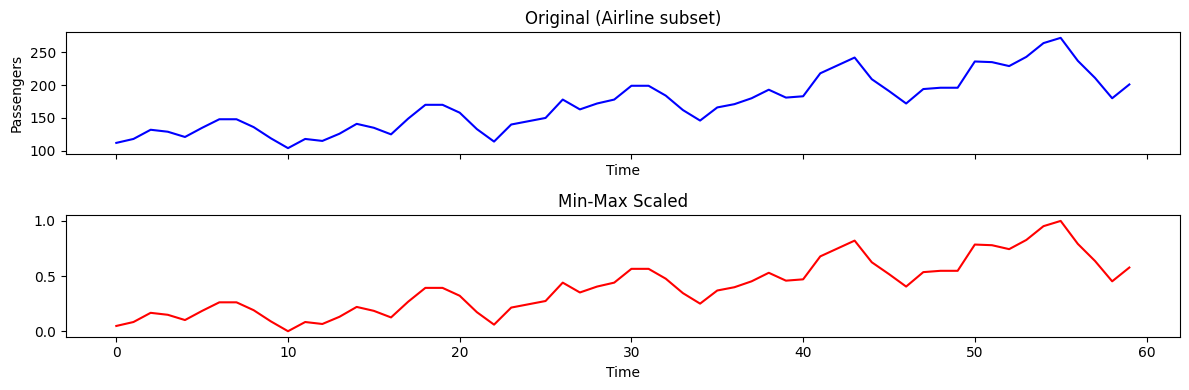

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sktime.datasets import load_airline

y = load_airline().values
y_segment = y[:60]

scaler = MinMaxScaler()
y_minmax = scaler.fit_transform(y_segment.reshape(-1, 1)).ravel()

fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
axes[0].plot(y_segment, color="blue")
axes[0].set_title("Original (Airline subset)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Passengers")
axes[1].plot(y_minmax, color="red")
axes[1].set_title("Min-Max Scaled")
axes[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

## Standard Scaling

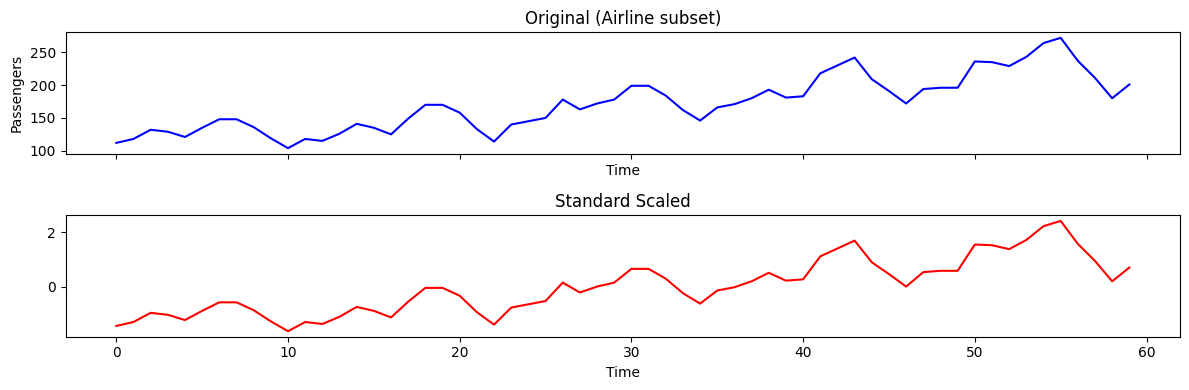

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sktime.datasets import load_airline

y = load_airline().values
y_segment = y[:60]

scaler = StandardScaler()
y_standard = scaler.fit_transform(y_segment.reshape(-1, 1)).ravel()

fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
axes[0].plot(y_segment, color="blue")
axes[0].set_title("Original (Airline subset)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Passengers")
axes[1].plot(y_standard, color="red")
axes[1].set_title("Standard Scaled")
axes[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

## L2 Normalizing

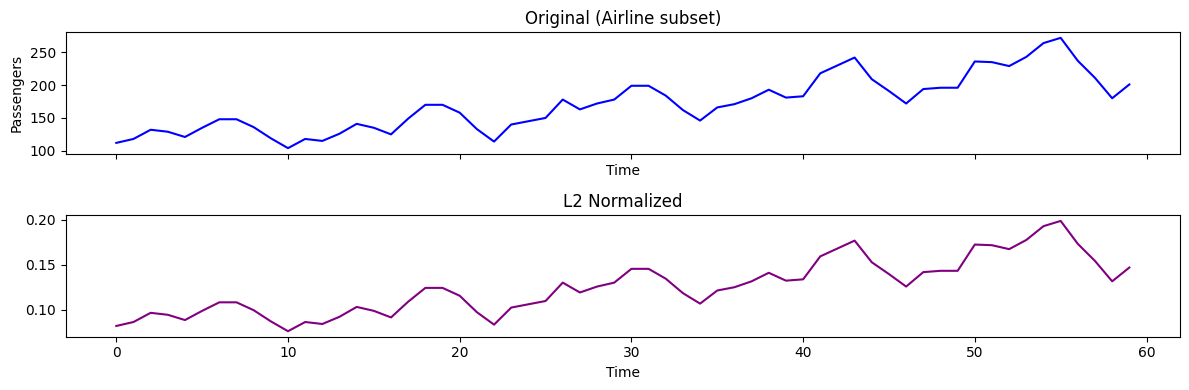

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_airline

def l2_normalize(arr):
    norm = np.linalg.norm(arr)
    return arr / norm if norm != 0 else arr

y = load_airline().values
y_segment = y[:60]
y_l2 = l2_normalize(y_segment)

fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
axes[0].plot(y_segment, color="blue")
axes[0].set_title("Original (Airline subset)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Passengers")
axes[1].plot(y_l2, color="purple")
axes[1].set_title("L2 Normalized")
axes[1].set_xlabel("Time")
plt.tight_layout()
plt.show()

## Smoothing

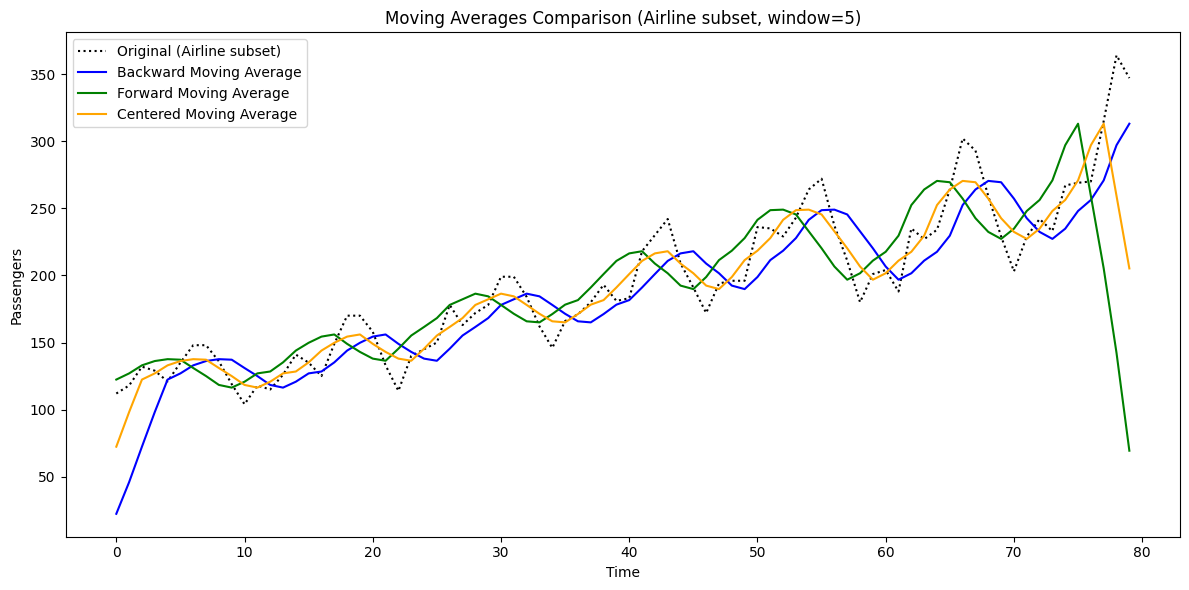

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_airline

y = load_airline().values
y_segment = y[:80]

def backward_moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode="full")[: len(data)]

def forward_moving_average(data, window_size):
    return np.convolve(data[::-1], np.ones(window_size) / window_size, mode="full")[: len(data)][::-1]

def centered_moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode="same")

window_size = 5
backward_avg = backward_moving_average(y_segment, window_size)
forward_avg = forward_moving_average(y_segment, window_size)
centered_avg = centered_moving_average(y_segment, window_size)

plt.figure(figsize=(12, 6))
plt.plot(y_segment, label="Original (Airline subset)", color="black", linestyle="dotted")
plt.plot(backward_avg, label="Backward Moving Average", color="blue")
plt.plot(forward_avg, label="Forward Moving Average", color="green")
plt.plot(centered_avg, label="Centered Moving Average", color="orange")
plt.title("Moving Averages Comparison (Airline subset, window=5)")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.tight_layout()
plt.show()